# Linear regression 
Linear regression (LR) is a method used to model the linear relationship between a dependent variable (target) and one or more independent variables (predictors).
- Observed data: Y=mx+c or Y=m1x1+m2x2+…+mpxp+c+error 
- Predicted data: Y’=m1x1+m2x2+…+mpxp+c 
- Error: error=Y-Y’

The **LR** model is based on several assumptions (e.g., errors are normally distributed with zero mean and constant variance). Provided the assumptions are satisfied, the regression estimators are optimal in the sense that they are unbiased, efficient, and consistent.

- **Unbiased** means that the expected value of the estimator is equal to the true value of the parameter. 
- **Efficient** means that the estimator has a smaller variance than any other estimator. 
- **Consistent** means that the bias and variance of the estimator approach zero as the sample size approaches infinity.

How good is the model? 
R2 also called as coefficient of determination summarizes the explanatory power of the regression model and is computed from the sums-of-squares terms. R2 describes the proportion of variance of the dependent variable explained by the regression model. If the regression model is “perfect”, SSE is zero, and R2 is 1. If the regression model is a total failure, SSE is equal to SST, no variance is explained by regression, and R2 is zero. 
- **It is important to keep in mind that there is no direct relationship between high R2 and causation.**

**Model Selection**
A frequent problem in data mining is to avoid predictors that do not contribute significantly to model prediction. First, It has been shown that dropping predictors that have insignificant coefficients can reduce the average error of predictions. Second, estimation of regression coefficients are likely to be unstable due to multicollinearity in models with many variables. Finally, a simpler model is a better model with more insight into the influence of predictors in models. There are two main methods of model selection: Forward selection, the best predictors are entered in the model, one by one. Backward Elimination, the worst predictors are eliminated from the model, one by one.

**Assumptions**:
1. All Variable must be numeric , continuous and nor categorical
2. Data is free of missing Values
3. There is a linear relation between predictors and predicant
4. All predictors are independent of each other
5. Residuals (prediction errors) are normally distributed

# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Data Cooking

In [2]:
try_data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
try_data.head(1)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1


In [49]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
# If we set index_col=0 we're explicitly stating to treat the first column as the index
df.head(1)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Asumption fulfillment

In [6]:
# reseting to defaults
sns.set()

# Set figure aspects by passing dictionary to rc parameter with key : value pair in seaborn set method
# **to view all available rcParams run below 2 lines
# import matplotlib
# matplotlib.rcParams.keys()

sns.set(rc={'figure.figsize':(12,8),
            'axes.labelsize': 15.0,
            'xtick.labelsize': 15.0,
            'ytick.labelsize': 15.0})

# seting the background
sns.set_style("whitegrid") # white, dark, whitegrid, darkgrid, ticks

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster.
# sns.set_context("notebook")

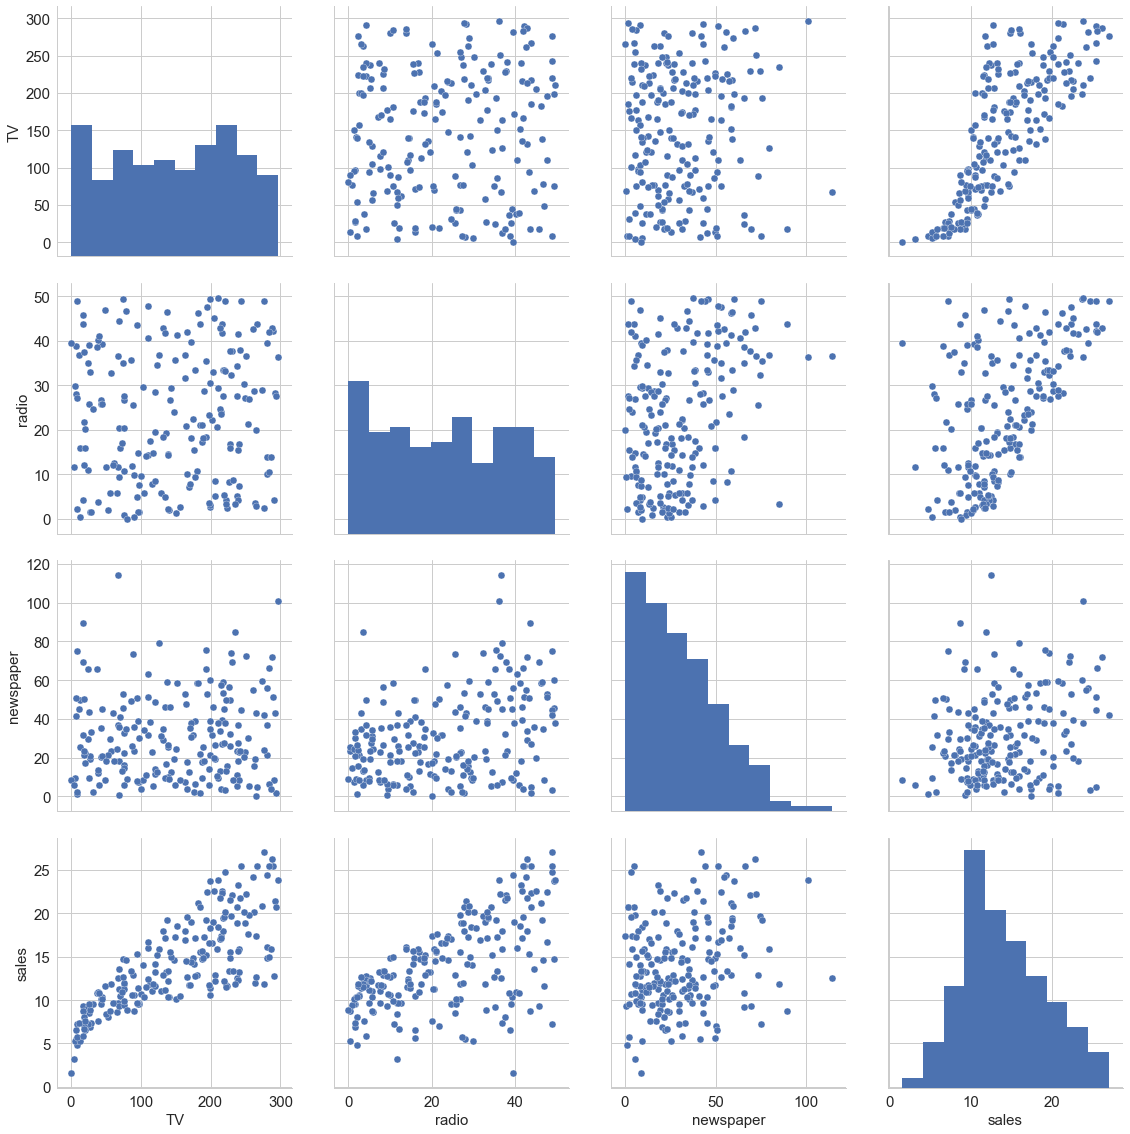

In [7]:
sns.pairplot(df, size=4)

In [8]:
# missing valus

def checkMissingValue(df):
    print('Is there any missing values: ',df.isnull().values.any())
    print('How many Total missing values',df.isnull().sum().sum())
    null_columns = df[df.columns[df.isnull().any()]].isnull().sum()
    print('Columns With NaN: & there SUM\n', null_columns)
checkMissingValue(df)

Is there any missing values:  False
How many Total missing values 0
Columns With NaN: & there SUM
 Series([], dtype: float64)


In [9]:
# There is a linear relation between predictors and predicant
# All predictors are independent of each other
df.corr(method='pearson') #  {‘pearson’, ‘kendall’, ‘spearman’}

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Scaling

In [50]:
SC_scale = StandardScaler()

In [54]:
df_scaled=df.copy() #Deep copy or else they point to same object

In [55]:
df_scaled.iloc[:,0:3]=SC_scale.fit_transform(df_scaled.iloc[:,0:3])
df_scaled.head(1)

,TV,radio,newspaper,sales
1,0.969852,0.981522,1.778945,22.1


In [56]:
df.head(1)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1


# Data Visualization 

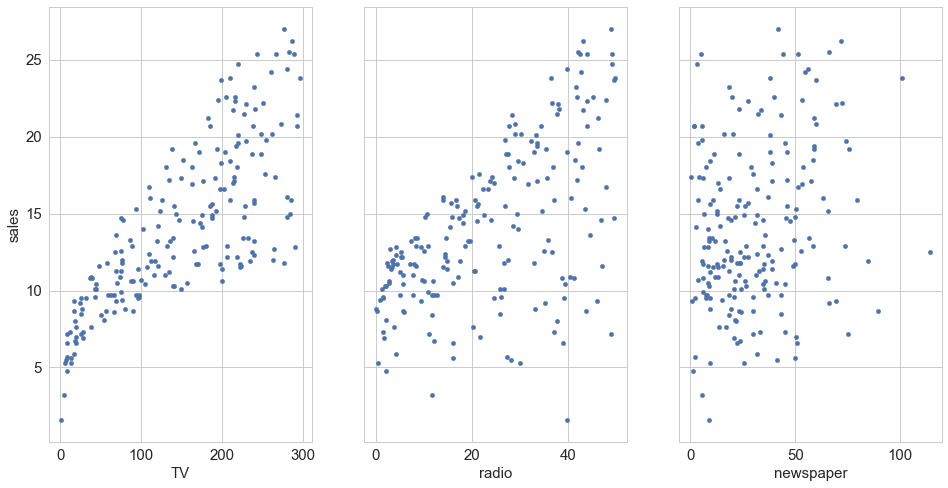

In [57]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))# good co relation
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

#  For Single Feature (TV)

In [58]:
x = df_scaled[['TV']] #1D
y = df_scaled[['sales']]
# Tip: keep feature n label in dataframe to avoid reshaping issues

In [61]:
# creating an object of LR
model1= LinearRegression()
modelx= LinearRegression()

## Using Train Test Split method depends on random state

In [82]:
x_train, x_test, y_train, y_test =train_test_split(x , y , test_size=0.3,random_state=9)
model1.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print('Training Score: ',model1.score(x_train,y_train))
print('Testing Score: ',model1.score(x_test,y_test))
print(model1.intercept_)#c
print(model1.coef_)#m

Training Score:  0.6462575775839752
Testing Score:  0.5138892470208254
[14.01131164]
[[4.25153789]]


##  Using Coss Validation

In [64]:
cv_results = cross_val_score(model1, x, y, cv=3)
print(cv_results)
np.mean(cv_results)

[0.61518267 0.65360781 0.53653802]


0.6017761657755372

## As whole Score is:

### Since Data is vety small (200 samples) , we will not split the data

In [65]:
model2= LinearRegression()

In [66]:
model2.fit(x, y)
print('Total Score: ',model2.score(x,y))

Total Score:  0.611875050850071


#### Predicting the sale, for expense on TV = $5,000

In [67]:
X_new =5
model2.predict(X_new)

array([[34.3775306]])

- 7270(approx.) item will sold

## - confusion matrix() cannot be used as it is not a classification model

##  Confidence in our Model

### Slope and Intercept of our Model1(for TV)

In [68]:
print("intercet: ",model1.intercept_)#c
print('slope: ',model1.coef_)#m

intercet:  [14.01131164]
slope:  [[4.25153789]]


### Range of confidance

In [69]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='sales ~ TV', data=df).fit()
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [70]:
# print the p-values for the model coefficients
lm1.pvalues
# TV           1.467390e-42<0.05

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

In [71]:
lm1.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

# Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [72]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

model3 = LinearRegression()
model3.fit(X, y)

# print intercept and coefficients
print(model3.intercept_)
print(model3.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


- keeping all factors constant
- for every 1 unit tv spent sale increases by 0.04576465
- radio is giving more ROI

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [73]:
lm2 = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm2.conf_int()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.58e-96
Time:                        11:51:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="text_cell_render border-box-sizing rendered_html">
<p>This summary provides quite a lot of information about the fit. The parts of the table we think are the most important are bolded in the description below.</p>
<p>&nbsp;</p>
<p>The left part of the first table provides basic information about the model fit:</p>
<p>&nbsp;</p>
<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Dep. Variable</td>
<td>Which variable is the response in the model</td>
</tr>
<tr>
<td>Model</td>
<td>What model you are using in the fit</td>
</tr>
<tr>
<td>Method</td>
<td>How the parameters of the model were calculated</td>
</tr>
<tr>
<td>No. Observations</td>
<td>The number of observations (examples)</td>
</tr>
<tr>
<td>DF Residuals</td>
<td>Degrees of freedom of the residuals. Number of observations - number of parameters</td>
</tr>
<tr>
<td>DF Model</td>
<td>Number of parameters in the model (not including the constant term if present)</td>
</tr>
</tbody>
</table>
<p>The right part of the first table shows the goodness of fit</p>
<p>&nbsp;</p>
<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>R-squared</strong></td>
<td>The <a href="http://en.wikipedia.org/wiki/Coefficient_of_determination">coefficient of determination</a>. A statistical measure of how well the regression line approximates the real data points</td>
</tr>
<tr>
<td><strong>Adj. R-squared</strong></td>
<td>The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals</td>
</tr>
<tr>
<td>F-statistic</td>
<td>A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals</td>
</tr>
<tr>
<td>Prob (F-statistic)</td>
<td>The probability that you would get the above statistic, given the null hypothesis that they are unrelated</td>
</tr>
<tr>
<td>Log-likelihood</td>
<td>The log of the likelihood function.</td>
</tr>
<tr>
<td>AIC</td>
<td>The <a href="http://en.wikipedia.org/wiki/Akaike_information_criterion">Akaike Information Criterion</a>. Adjusts the log-likelihood based on the number of observations and the complexity of the model.</td>
</tr>
<tr>
<td>BIC</td>
<td>The <a href="http://en.wikipedia.org/wiki/Bayesian_information_criterion">Bayesian Information Criterion</a>. Similar to the AIC, but has a higher penalty for models with more parameters.</td>
</tr>
</tbody>
</table>
<p>The second table reports for each of the coefficients</p>
<p>&nbsp;</p>
<table>
<thead>
<tr>
<th>&nbsp;</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>&nbsp;</td>
<td>The name of the term in the model</td>
</tr>
<tr>
<td>coef</td>
<td>The estimated value of the coefficient</td>
</tr>
<tr>
<td>std err</td>
<td>The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.</td>
</tr>
<tr>
<td>t</td>
<td>The t-statistic value. This is a measure of how statistically significant the coefficient is.</td>
</tr>
<tr>
<td><strong>P &gt; |t|</strong></td>
<td>P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.</td>
</tr>
<tr>
<td><strong>[95.0% Conf. Interval]</strong></td>
<td>
<p>The lower and upper values of the 95% confidence interval</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>
<p>Finally, there are several statistical tests to assess the distribution of the residuals</p>
<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Skewness</td>
<td>A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).</td>
</tr>
<tr>
<td>Kurtosis</td>
<td>A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).</td>
</tr>
<tr>
<td>Omnibus</td>
<td>D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.</td>
</tr>
<tr>
<td>Prob(Omnibus)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Jarque-Bera</td>
<td>A different test of the skewness and kurtosis</td>
</tr>
<tr>
<td>Prob (JB)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Durbin-Watson</td>
<td>A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis</td>
</tr>
<tr>
<td>Cond. No</td>
<td>A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).</td>
</tr>
</tbody>
</table>
</div>

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **what features has to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [74]:
# only include TV and Radio in the model
lm3 = smf.ols(formula='sales ~ TV + radio', data=df).fit()
lm3.rsquared

0.8971942610828957

In [75]:
# add Newspaper to the model (which we believe has no association with Sales)
lm4 = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm4.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

# Adding categorical data

In [76]:
np.random.seed(12345)
# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'small'
df.loc[mask_large, 'Size'] = 'large'
df.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [77]:
np.random.seed(123456)
nums = np.random.rand(len(df))

mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66

df['Area'] = 'rural' # Default
# data.loc[row, column]

df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban, 'Area'] = 'urban'
df.head()

,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,large,rural
2,44.5,39.3,45.1,10.4,small,urban
3,17.2,45.9,69.3,9.3,small,rural
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


In [78]:
df=pd.get_dummies(df, columns=['Size','Area'])
df.head()

,TV,radio,newspaper,sales,Size_large,Size_small,Area_rural,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,1,0,1,0,0
2,44.5,39.3,45.1,10.4,0,1,0,0,1
3,17.2,45.9,69.3,9.3,0,1,1,0,0
4,151.5,41.3,58.5,18.5,0,1,0,0,1
5,180.8,10.8,58.4,12.9,1,0,0,1,0


In [79]:
df=df.drop(['Size_small','Area_rural'], axis=1)
df.head()

,TV,radio,newspaper,sales,Size_large,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,1,0,0
2,44.5,39.3,45.1,10.4,0,0,1
3,17.2,45.9,69.3,9.3,0,0,0
4,151.5,41.3,58.5,18.5,0,0,1
5,180.8,10.8,58.4,12.9,1,1,0


In [80]:
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = df[feature_cols]
y = df.sales

lm = LinearRegression()
lm.fit(X, y)

zip(feature_cols, lm.coef_) # ['TV',tv_coeff]
print(list(zip(feature_cols,lm.coef_)))

[('TV', 0.04574401036331372), ('radio', 0.1878666955252582), ('newspaper', -0.0010876977267108567), ('Size_large', 0.07739660749747908), ('Area_suburban', -0.1065629901595863), ('Area_urban', 0.26813802165220085)]


- How do we interpret the IsLarge coefficient?
- For spending of TV/Radio/Newspaper ad  remaining constant, 
- **large market** is associated with an average **increase** in Sales of 77.39 widgets (as compared to a Small market, which is called the baseline level).
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).